core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for se

Wszystkie dane załadowane.

Dostępne wyścigi w sezonie 2023:
 - Bahrain
 - Saudi Arabia
 - Australia
 - Azerbaijan
 - Miami
 - Emilia Romagna
 - Monaco
 - Spain
 - Canada
 - Austria
 - Great Britain
 - Hungary
 - Belgium
 - Netherlands
 - Italy
 - Singapore
 - Japan
 - Qatar
 - United States
 - Mexico
 - Brazil
 - Las Vegas
 - Abu Dhabi



Podaj etykietę wyścigu, aby zobaczyć szczegóły:  Bahrain


,kategoria,kod,opis
0,temperatura,1,umiarkowana
1,temperatura_toru,1,umiarkowana
2,wilgotność,0,niska
3,ciśnienie,1,normalne
4,wiatr,0,spokojny
5,opady,1,umiarkowane
6,kierunek_wiatru,0,0°


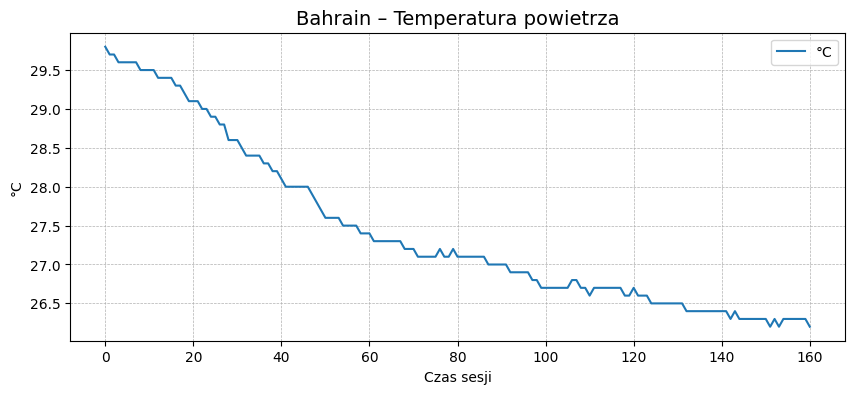

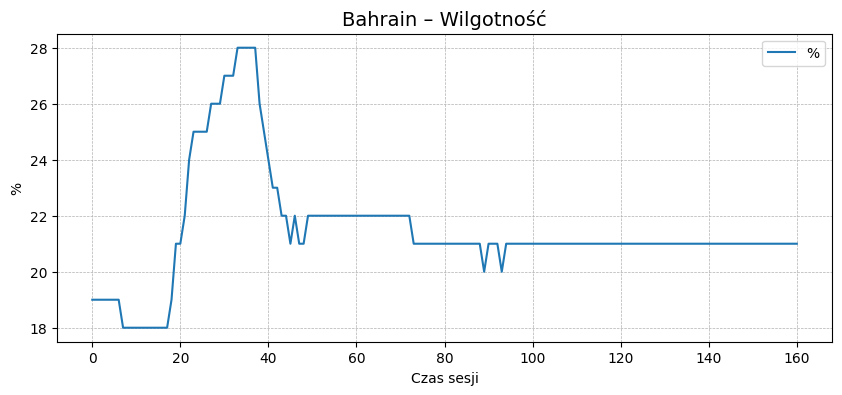

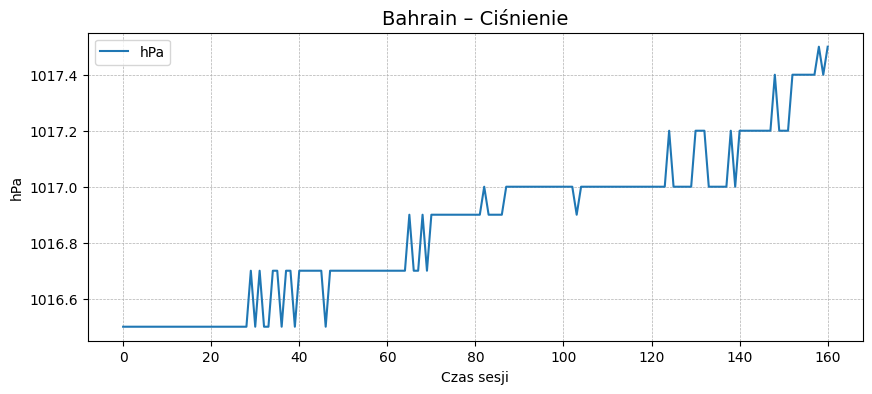

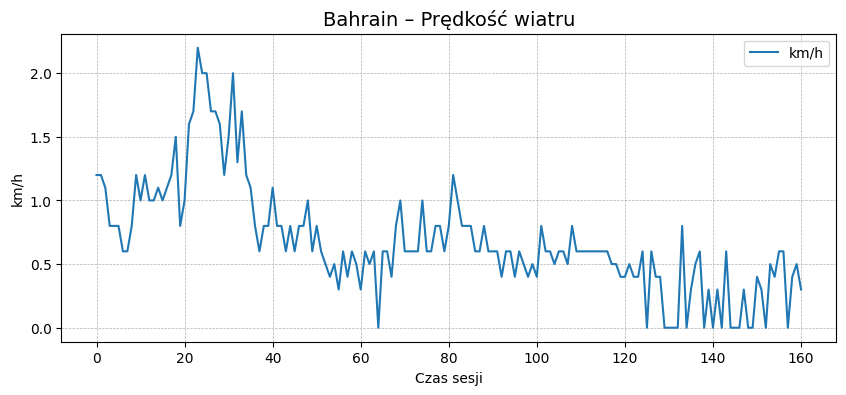

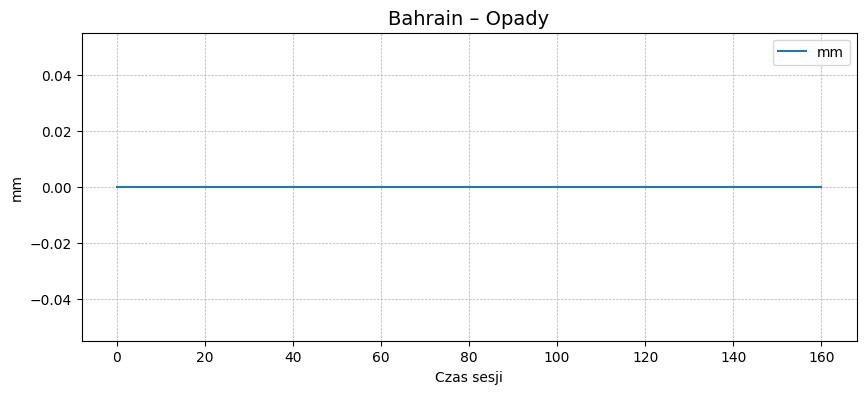

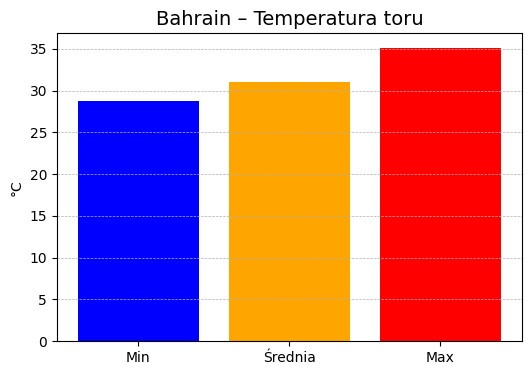

C:\Users\mstef\AppData\Local\Temp\ipykernel_19656\764388287.py:132: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap, normcol = get_cmap('hsv'), Normalize(0, 360)


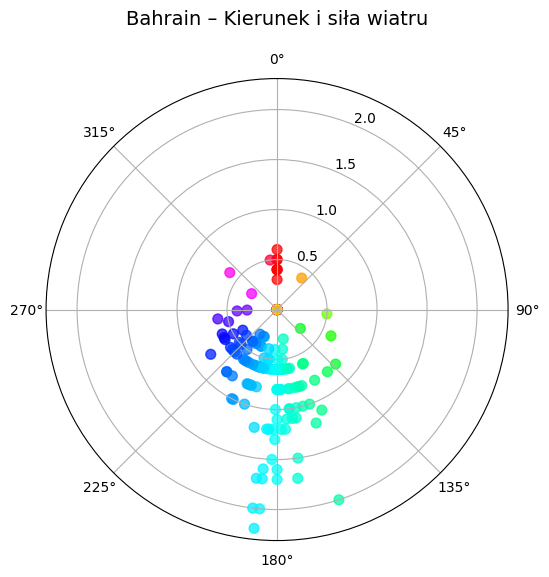

In [16]:
import fastf1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

fastf1.Cache.enable_cache('cache')

races = [
    {'year': 2023, 'gp': 'Bahrain',      'label': 'Bahrain'},
    {'year': 2023, 'gp': 'SaudiArabia',  'label': 'Saudi Arabia'},
    {'year': 2023, 'gp': 'Australia',    'label': 'Australia'},
    {'year': 2023, 'gp': 'Azerbaijan',   'label': 'Azerbaijan'},
    {'year': 2023, 'gp': 'Miami',        'label': 'Miami'},
    {'year': 2023, 'gp': 'EmiliaRomagna','label': 'Emilia Romagna'},
    {'year': 2023, 'gp': 'Monaco',       'label': 'Monaco'},
    {'year': 2023, 'gp': 'Spain',        'label': 'Spain'},
    {'year': 2023, 'gp': 'Canada',       'label': 'Canada'},
    {'year': 2023, 'gp': 'Austria',      'label': 'Austria'},
    {'year': 2023, 'gp': 'GreatBritain', 'label': 'Great Britain'},
    {'year': 2023, 'gp': 'Hungary',      'label': 'Hungary'},
    {'year': 2023, 'gp': 'Belgium',      'label': 'Belgium'},
    {'year': 2023, 'gp': 'Netherlands',  'label': 'Netherlands'},
    {'year': 2023, 'gp': 'Italy',        'label': 'Italy'},
    {'year': 2023, 'gp': 'Singapore',    'label': 'Singapore'},
    {'year': 2023, 'gp': 'Japan',        'label': 'Japan'},
    {'year': 2023, 'gp': 'Qatar',        'label': 'Qatar'},
    {'year': 2023, 'gp': 'USA',          'label': 'United States'},
    {'year': 2023, 'gp': 'Mexico',       'label': 'Mexico'},
    {'year': 2023, 'gp': 'Brazil',       'label': 'Brazil'},
    {'year': 2023, 'gp': 'LasVegas',     'label': 'Las Vegas'},
    {'year': 2023, 'gp': 'AbuDhabi',     'label': 'Abu Dhabi'},
]

label_maps = {
    'temperatura':   {0: 'niska', 1: 'umiarkowana', 2: 'wysoka'},
    'wilgotność':    {0: 'niska', 1: 'normalna',    2: 'wysoka'},
    'opady':         {0: 'brak/lekkie', 1: 'umiarkowane', 2: 'mocne'},
    'ciśnienie':     {0: 'niskie', 1: 'normalne',    2: 'wysokie'},
    'wiatr':         {0: 'spokojny', 1: 'umiarkowany', 2: 'mocny'},
    'temperatura_toru': {0: 'niska', 1: 'umiarkowana', 2: 'wysoka'}
}

session_cache = {}
for r in races:
    try:
        sess = fastf1.get_session(r['year'], r['gp'], 'R')
        sess.load(laps=True, telemetry=False, weather=True, messages=False)
        session_cache[r['label']] = sess
    except Exception as e:
        session_cache[r['label']] = None
        if r['label'] != 'GP Emilii-Romanii':
            print(f"⚠️ Nie udało się załadować sesji dla {r['label']}: {e}")
print("Wszystkie dane załadowane.")


def calculate_season_stats():
    recs = []
    for label, sess in session_cache.items():
        if sess and hasattr(sess, 'weather_data') and not sess.weather_data.empty:
            w = sess.weather_data
            recs.append({
                'temperature':   w['AirTemp'].mean(),
                'track_temp':    w['TrackTemp'].mean() if 'TrackTemp' in w else np.nan,
                'humidity':      w['Humidity'].mean(),
                'pressure':      w['Pressure'].mean(),
                'wind':          w['WindSpeed'].mean(),
                'precipitation': w['Rainfall'].sum()
            })
    df = pd.DataFrame(recs)
    return df.mean().to_dict(), df.std().to_dict()

def classify_relative_to_season(w_data, mean, std):
    vals = {
        'temperature':   w_data['AirTemp'].mean(),
        'track_temp':    w_data['TrackTemp'].mean() if 'TrackTemp' in w_data and not w_data['TrackTemp'].empty else np.nan,
        'humidity':      w_data['Humidity'].mean(),
        'pressure':      w_data['Pressure'].mean(),
        'wind':          w_data['WindSpeed'].mean(),
        'precipitation': w_data['Rainfall'].sum()
    }
    codes = {}
    for cat, x in vals.items():
        if pd.isna(x): continue
        μ, σ = mean[cat], std[cat]
        codes[cat] = 2 if x > μ + σ else 0 if x < μ - σ else 1

    codes['wind_dir'] = int(w_data['WindDirection'].mode()[0])
    return codes

def plot_time_series(w, col, title, ylabel):
    series = w.get(col)
    if series is None or series.empty:
        print(f"Brak danych do wyświetlenia dla: {title}")
        return
    plt.figure(figsize=(10, 4))
    plt.plot(series.index, series.values, label=ylabel)
    plt.title(title, fontsize=14)
    plt.ylabel(ylabel)
    plt.xlabel('Czas sesji')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

def plot_all(label):
    sess = session_cache.get(label)
    if not sess or not hasattr(sess, 'weather_data') or sess.weather_data.empty:
        print(f"Brak danych pogodowych dla {label} do wygenerowania wykresów.")
        return

    w = sess.weather_data

    plot_time_series(w, 'AirTemp',   f"{label} – Temperatura powietrza", "°C")
    plot_time_series(w, 'Humidity',  f"{label} – Wilgotność", "%")
    plot_time_series(w, 'Pressure',  f"{label} – Ciśnienie", "hPa")
    plot_time_series(w, 'WindSpeed', f"{label} – Prędkość wiatru", "km/h")
    plot_time_series(w, 'Rainfall',  f"{label} – Opady", "mm")

    temps = w.get('TrackTemp')
    if temps is not None and not temps.empty:
        plt.figure(figsize=(6, 4))
        plt.bar(['Min', 'Średnia', 'Max'], [temps.min(), temps.mean(), temps.max()], color=['blue', 'orange', 'red'])
        plt.title(f"{label} – Temperatura toru", fontsize=14)
        plt.ylabel('°C')
        plt.grid(axis='y', linestyle='--', linewidth=0.5)
        plt.show()

    dirs = w.get('WindDirection')
    speeds = w.get('WindSpeed')
    if speeds is not None and not speeds.empty and dirs is not None and not dirs.empty:
        cmap, normcol = get_cmap('hsv'), Normalize(0, 360)
        plt.figure(figsize=(6, 6))
        ax = plt.subplot(projection='polar')
        ax.scatter(np.radians(dirs), speeds, c=dirs, cmap=cmap, norm=normcol, s=50, alpha=0.75)
        ax.set_theta_zero_location('N')
        ax.set_theta_direction(-1)
        ax.set_title(f"{label} – Kierunek i siła wiatru", y=1.1, fontsize=14)
        plt.show()

def main():
    mean_stats, std_stats = calculate_season_stats()

    print("\nDostępne wyścigi w sezonie 2023:")
    for r in races:
        if r['label'] in session_cache and session_cache[r['label']] is not None:
            print(f" - {r['label']}")

    choice = input("\nPodaj etykietę wyścigu, aby zobaczyć szczegóły: ").strip()

    sess = session_cache.get(choice)
    if sess is None:
        print("Nie znaleziono wyścigu lub brak danych dla tej sesji (np. wyścig odwołany).")
        return

    w_data = sess.weather_data
    codes = classify_relative_to_season(w_data, mean_stats, std_stats)

    mapping = {
        'temperature': 'temperatura', 'humidity': 'wilgotność',
        'precipitation': 'opady', 'pressure': 'ciśnienie',
        'wind': 'wiatr', 'track_temp': 'temperatura_toru'
    }
    rows = []
    for cat, code in codes.items():
        if cat == 'wind_dir':
            rows.append({'kategoria': 'kierunek_wiatru', 'kod': code, 'opis': f"{code}°"})
        else:
            key = mapping[cat]
            rows.append({'kategoria': key, 'kod': code, 'opis': label_maps[key][code]})

    df = pd.DataFrame(rows)
    display(df)
    plot_all(choice)

if __name__ == "__main__":
    main()

In [17]:
class WeatherSeasonClassifier:
    def __init__(self, races, race_data_manual):
        self.races = races
        self.manual = race_data_manual
        self._session_cache = {}

        self._load_all_sessions_to_cache()

        self._compute_season_stats()
        self._compute_per_lap_weather()

    def _load_all_sessions_to_cache(self):
        for r in self.races:
            try:
                sess = fastf1.get_session(r['year'], r['gp'], 'R')
                sess.load(laps=True, weather=True)
                self._session_cache[r['label']] = sess
            except Exception as e:
                self._session_cache[r['label']] = None
                if 'Emilia Romagna' not in r['gp']:
                    print(f"⚠️ Nie udało się załadować danych dla {r['label']}: {e}")
        print("Inicjalizacja pamięci podręcznej zakończona.")

    def _compute_season_stats(self):
        records = []
        for label, sess in self._session_cache.items():
            if sess and hasattr(sess, 'weather_data') and not sess.weather_data.empty:
                w = sess.weather_data
                records.append({
                    'temperature':   w['AirTemp'].mean(),
                    'track_temp':    w['TrackTemp'].mean() if 'TrackTemp' in w.columns else np.nan,
                    'humidity':      w['Humidity'].mean(),
                    'pressure':      w['Pressure'].mean(),
                    'wind':          w['WindSpeed'].mean(),
                    'precipitation': w['Rainfall'].sum()
                })
        
        df = pd.DataFrame(records)
        self.mean = df.mean()
        self.std = df.std()

    def _compute_per_lap_weather(self):
        all_laps_weather = []
        for label, sess in self._session_cache.items():
            if sess and hasattr(sess, 'weather_data') and not sess.weather_data.empty and hasattr(sess, 'laps') and not sess.laps.empty:
                w = sess.weather_data.copy()
                laps = sess.laps[['LapNumber', 'LapStartTime', 'LapTime']].reset_index(drop=True)
                laps['EndTime'] = laps['LapStartTime'] + laps['LapTime']

                def find_lap(ts):
                    sel = laps[(laps['LapStartTime'] <= ts) & (laps['EndTime'] > ts)]
                    return int(sel['LapNumber'].iloc[0]) if not sel.empty else np.nan
                
                w['Lap'] = w['Time'].apply(find_lap)

                grp = w.dropna(subset=['Lap']).groupby('Lap').agg({
                    'AirTemp': 'mean',
                    'TrackTemp': 'mean',
                    'Humidity': 'mean',
                    'Pressure': 'mean',
                    'WindSpeed': 'mean',
                    'Rainfall': 'sum'
                }).reset_index()
                
                grp['label'] = label
                all_laps_weather.append(grp)
        
        self.per_lap = pd.concat(all_laps_weather, ignore_index=True)

    def classify_lap(self, row):
        vals = {
            'temperature':   row['AirTemp'],
            'track_temp':    row['TrackTemp'] if not np.isnan(row['TrackTemp']) else self.manual[row['label']]['manual']['avg'],
            'humidity':      row['Humidity'],
            'pressure':      row['Pressure'],
            'wind':          row['WindSpeed'],
            'precipitation': row['Rainfall']
        }
        codes = {}
        for cat in ['temperature', 'humidity', 'precipitation', 'pressure', 'wind', 'track_temp']:
            if pd.isna(vals[cat]): continue
            μ, σ, x = self.mean[cat], self.std[cat], vals[cat]
            codes[cat] = 2 if x > μ + σ else 0 if x < μ - σ else 1
        return pd.Series(codes)

    def get_classified(self):
        if not hasattr(self, 'per_lap'):
            return pd.DataFrame()
        
        classified = self.per_lap.copy()
        codes = classified.apply(self.classify_lap, axis=1)
        return pd.concat([classified, codes], axis=1)

    def attach_to_df(self, df, label):
        lap_weather = self.get_classified()
        lap_weather = lap_weather[lap_weather['label'] == label]
        
        lap_weather = lap_weather.rename(columns={
            'Lap': 'LapNumber',
            'temperature': 'temp_code',
            'humidity': 'hum_code',
            'precipitation': 'rain_code',
            'pressure': 'pres_code',
            'wind': 'wind_code',
            'track_temp': 'track_code'
        })
        
        merge_cols = [
            'LapNumber', 'temp_code', 'hum_code', 'rain_code', 
            'pres_code', 'wind_code', 'track_code'
        ]
        
        existing_cols = [col for col in merge_cols if col in lap_weather.columns]
        
        return df.merge(lap_weather[existing_cols], on='LapNumber', how='left')

classifier = WeatherSeasonClassifier(races, race_data)

df_all = classifier.get_classified()

print("Dostępne wyścigi 2023:")
for lbl in df_all['label'].unique():
    print(" -", lbl)
choice = input("Podaj etykietę wyścigu: ").strip()

df_gp = df_all[df_all['label'] == choice].copy()
if df_gp.empty:
    print(f"Brak danych dla wyścigu '{choice}'.")
else:
    column_order = [
        'Lap', 'AirTemp', 'TrackTemp', 'Humidity', 'Pressure', 'WindSpeed', 'Rainfall',
        'label', 'temperature', 'humidity', 'precipitation', 'pressure', 'wind', 'track_temp'
    ]
    cols = [c for c in column_order if c in df_gp.columns]

    df_to_display = df_gp[cols].set_index('Lap')
    display(df_to_display)

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
core           INFO 	Loading data for Saudi Arabian Grand Pri

Inicjalizacja pamięci podręcznej zakończona.
Dostępne wyścigi 2023:
 - Bahrain
 - Saudi Arabia
 - Australia
 - Azerbaijan
 - Miami
 - Emilia Romagna
 - Monaco
 - Spain
 - Canada
 - Austria
 - Great Britain
 - Hungary
 - Belgium
 - Netherlands
 - Italy
 - Singapore
 - Japan
 - Qatar
 - United States
 - Mexico
 - Brazil
 - Las Vegas
 - Abu Dhabi


Podaj etykietę wyścigu:  Bahrain


,AirTemp,TrackTemp,Humidity,Pressure,WindSpeed,Rainfall,label,temperature,humidity,precipitation,pressure,wind,track_temp
Lap,,,,,,,,,,,,,
1.0,27.30,31.20,22.0,1016.70,0.55,0,Bahrain,1,0,1,1,0,1
2.0,27.30,31.10,22.0,1016.80,0.30,0,Bahrain,1,0,1,1,0,1
3.0,27.30,31.20,22.0,1016.70,0.60,0,Bahrain,1,0,1,1,0,1
4.0,27.25,31.15,22.0,1016.80,0.60,0,Bahrain,1,0,1,1,0,1
5.0,27.20,31.00,22.0,1016.80,0.80,0,Bahrain,1,0,1,1,0,1
6.0,27.10,31.00,22.0,1016.90,0.60,0,Bahrain,1,0,1,1,0,1
7.0,27.10,30.90,21.5,1016.90,0.60,0,Bahrain,1,0,1,1,0,1
8.0,27.10,30.90,21.0,1016.90,1.00,0,Bahrain,1,0,1,1,1,1
9.0,27.15,30.85,21.0,1016.90,0.60,0,Bahrain,1,0,1,1,0,1
